## Mammographic Mass Data

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

### Task 1 – Problem Formulation, Data Acquisition, and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
col_name = ["BI-RADS assessment","Age","Shape","Margin","Density","Severity"] # Set Column names
data = pd.read_csv("mammographic_masses.data",names=col_name)                 # Read file 

data.to_csv("mammographic_masses.csv",index=False)                            # Convert .data to .csv

data = pd.read_csv("mammographic_masses.csv")                                 # Read CSV file

In [3]:
data.shape # Size of this dataset 

(961, 6)

In [4]:
data.info() # Check Datatypes of this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BI-RADS assessment  961 non-null    object
 1   Age                 961 non-null    object
 2   Shape               961 non-null    object
 3   Margin              961 non-null    object
 4   Density             961 non-null    object
 5   Severity            961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


Attributes
   1. BI-RADS assessment:     1 to 5 (ordinal)  
   2. Age:                    patient's age in years (integer)
   3. Shape: mass shape:      round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin:    circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density:                mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity:               benign = 0 or malignant=1 (binominal)

In [5]:
data.head() # Check for missing value # The Missing value in this dataset is ?

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [6]:
# Fill missing value with -1 as a place holder and to change the datatype of this set to integer
data.loc[data["BI-RADS assessment"] == "?","BI-RADS assessment"] = -1
data.loc[data["Age"] == "?","Age"] = -1
data.loc[data["Shape"] == "?","Shape"] = -1
data.loc[data["Margin"] == "?","Margin"] = -1
data.loc[data["Density"] == "?","Density"] = -1

# Change each column to integer
data["BI-RADS assessment"] = data["BI-RADS assessment"].astype(np.int64) 
data["Age"] = data["Age"].astype(np.int64) 
data["Shape"] = data["Shape"].astype(np.int64) 
data["Margin"] = data["Margin"].astype(np.int64) 
data["Density"] = data["Density"].astype(np.int64) 

# Convert -1 to np.nan because it is easier to detect the missing value than "?" string
data.loc[data["BI-RADS assessment"] == -1,"BI-RADS assessment"] = np.nan
data.loc[data["Age"] == -1,"Age"] = np.nan
data.loc[data["Shape"] == -1,"Shape"] = np.nan
data.loc[data["Margin"] == -1,"Margin"] = np.nan
data.loc[data["Density"] == -1,"Density"] = np.nan

In [7]:
# Explore the data
data.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [8]:
# Next Step we are going to clean data by Focusing on the First column "BI-RADS assessment"
print("Before")
print(sorted(data["BI-RADS assessment"].unique())) # Check unique value in the dataset
data.loc[data["BI-RADS assessment"] == 6,"BI-RADS assessment"] = 1               # Change to value 6 to 1 because in this column the number can only be from 1 to 5
data.loc[data["BI-RADS assessment"] == 55,"BI-RADS assessment"] = data['BI-RADS assessment'].mode()[0] # Fill this column with mode because it is categorical value
data.loc[data["BI-RADS assessment"] == 0,"BI-RADS assessment"] = data['BI-RADS assessment'].mode()[0]  # Fill this column with mode because it is categorical value
data['BI-RADS assessment'].fillna(value=data['BI-RADS assessment'].mode()[0], inplace=True)            # Fill np.nan values with mode
print("After")
print(sorted(data["BI-RADS assessment"].unique())) # unique value after this column has been cleaned

Before
[0.0, 2.0, 3.0, 4.0, 5.0, nan, 6.0, 55.0]
After
[1.0, 2.0, 3.0, 4.0, 5.0]


In [9]:
# Cleaning "Age" Column
# From, data.describe() we observed that in this column there are no outlier or any suspicious value. Therefore, we just need to fill up the np.nan rows
data['Age'].fillna(value=round(data['Age'].mean()), inplace=True) # Fill this column by mean because this column is a numerical column

In [10]:
# For the next 3 columns "Shape", "Margin" and "Density" 
# There is also no outlier or any suspicious value. Therefore, fill these column with mode because it is categorical value.
data['Shape'].fillna(value=data['Shape'].mode()[0], inplace=True)
data['Margin'].fillna(value=data['Margin'].mode()[0], inplace=True)
data['Density'].fillna(value=data['Density'].mode()[0], inplace=True)

In [11]:
data.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.258065,55.484912,2.762747,2.706556,2.917794,0.463059
std,0.701189,14.442416,1.243276,1.576272,0.365869,0.498893
min,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [12]:
data.info() # Now the dataset are cleaned with all column are float and integer that is ready to find correlation in the next step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  961 non-null    float64
 1   Age                 961 non-null    float64
 2   Shape               961 non-null    float64
 3   Margin              961 non-null    float64
 4   Density             961 non-null    float64
 5   Severity            961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


### Task 2 – Data Exploration (16%)

#### Exploring each column (i.e., attributes) by using appropriate descriptive statistics and graphical visualizations.

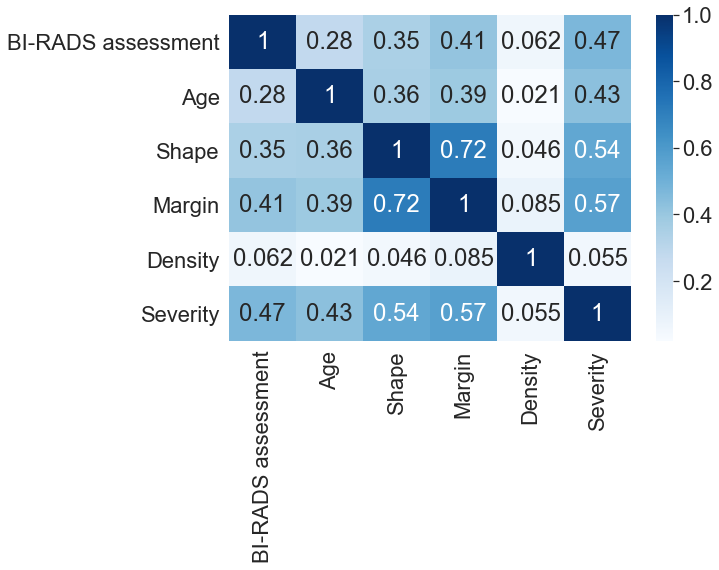

In [13]:
# Before exploring any column. By plotting, The correlation matrix will make it easier to find the relationship between each column.
sns.set(style="white",color_codes=True)           # Set style
sns.set(font_scale=2)                             # Set Font size 
plt.figure(figsize=(9,6))                         # Set Figure size
sns.heatmap(data.corr(),annot=True, cmap="Blues") # Heatmap
plt.show()

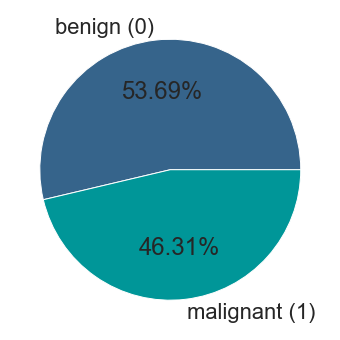

In [14]:
# 1. Start with finding the ratio of benign and malignant by displaying it in Pie chart

data.Severity.value_counts() # used to count the value for each column
plt.figure(figsize=(9,6))  
y = np.array([516, 445])     # Store the info from value_counts in this list 
mylabels = ["benign (0)", "malignant (1)"]
plt.pie(y, autopct='%1.2f%%',labels = mylabels,colors=["#36648b","#009698"])
plt.show()  

#### Exploring the relationships between all pairs of columns (for example 10 selected pairs of columns if the data set contains more than 10 attributes) by using appropriate descriptive statistics and/or graphical visualizations.

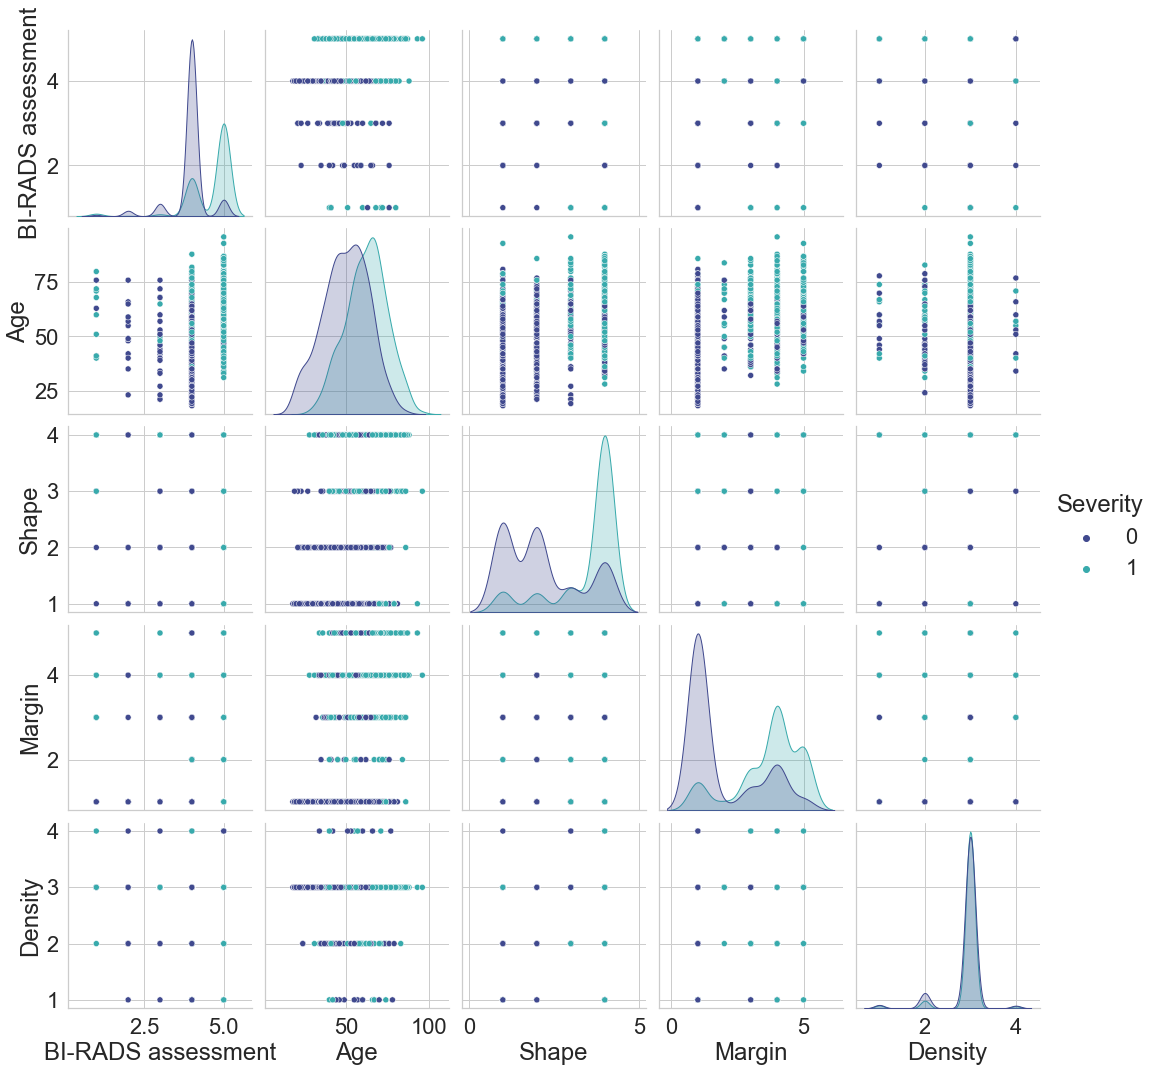

In [15]:
# A relationship of all column

sns.set_style("whitegrid")
sns.pairplot(data, hue='Severity', palette="mako", height=3)
plt.show()

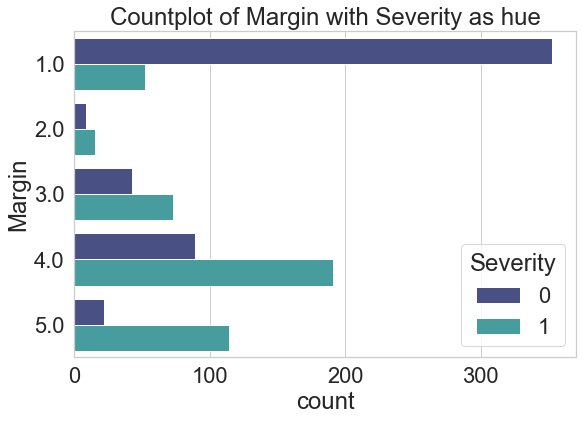

In [16]:
plt.figure(figsize=(9,6))
plt.title("Countplot of Margin with Severity as hue")
sns.countplot(data=data,y="Margin",hue="Severity",palette="mako")
plt.show()

The graph above indicates that lower margin tends to likely have benign instead of malignant. In contrast, the higher the margin is the higher chance to have malignant instead of benign

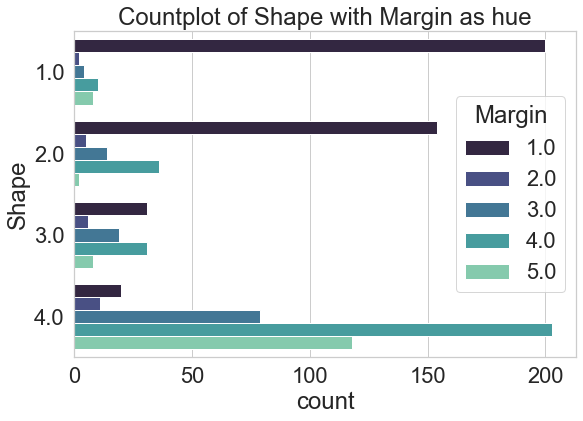

In [17]:
plt.figure(figsize=(9,6))
plt.title("Countplot of Shape with Margin as hue")
sns.countplot(data=data,y="Shape",hue="Margin",palette="mako")
plt.show()

The Graph shows that there is a positive correlation between Margin and Shape

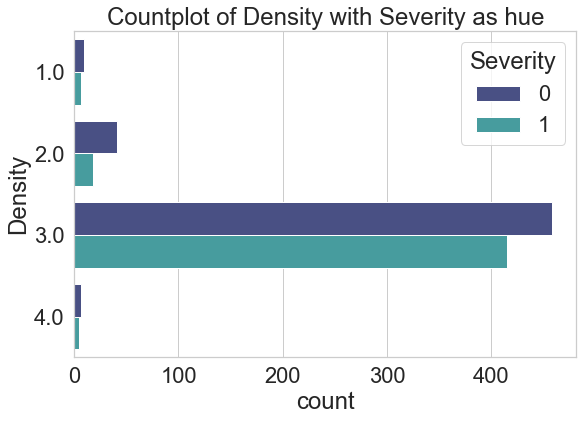

In [18]:
plt.figure(figsize=(9,6))
plt.title("Countplot of Density with Severity as hue")
sns.countplot(data=data,y="Density",hue="Severity",palette="mako")
plt.show()

Density has little to none effect on the severity because as a density decreases or increase there is no clear relationship between the density itself to the severity.

#### Posing one meaningful question and exploring the data by using appropriate methods to find its answer.

<b>Question</b> Which age group has the most mammography indicating benign label? answer as an approximate range

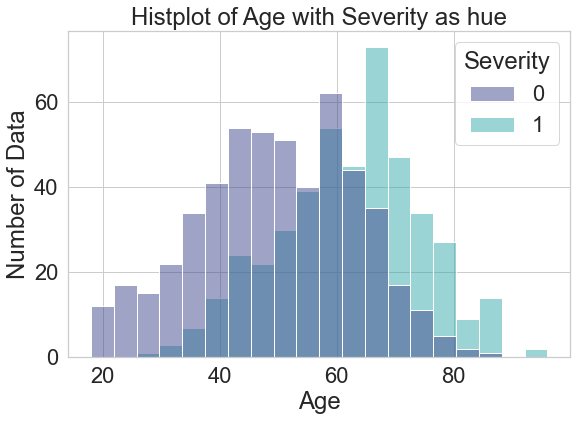

In [19]:
plt.figure(figsize=(9,6))
plt.title("Histplot of Age with Severity as hue")
plt.ylabel("Number of Data")
sns.histplot(data=data,x="Age",hue="Severity",bins=20,palette="mako")
plt.show()

<b>Answer</b> From the histogram, it can be concluded that the age groups the indicate benign label are in between 20 to 60 years old.

# Task 3 – Data Modelling (32%)

#### 1. First Classification Model (Random Forest)

 Splitting the data into a training set and a test set. Specifically, you need to split the data at the following ratios, respectively, to form three different suites oftraining and test sets

In [20]:
feature = data.columns[:-1] # Select the feature column ( In this case all column except the target column)
x = data[feature]           # Stored the feature variable in x
y = data[data.columns[-1]]  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(x,y,test_size=0.5, random_state = 654) # 50% for training and 50% for testing

In [21]:
feature = data.columns[:-1] # Select the feature column ( In this case all column except the target column)
x = data[feature]           # Stored the feature variable in x
y = data[data.columns[-1]]  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(x,y,test_size=0.4, random_state = 654) # 60% for training and 40% for testing

In [22]:
feature = data.columns[:-1] # Select the feature column ( In this case all column except the target column)
x = data[feature]           # Stored the feature variable in x
y = data[data.columns[-1]]  # Stored the target variable in y

from sklearn.model_selection import train_test_split
X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(x,y,test_size=0.2, random_state = 654) # 80% for training and 20% for testing

Model 1: Suite 1 (50% for training and 50% for testing) and Random Forest Model

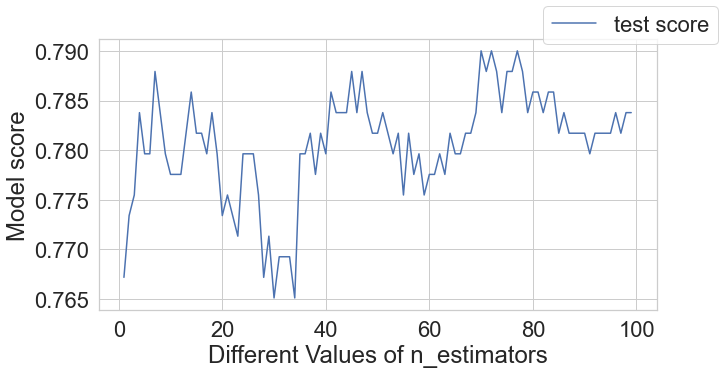

In [23]:
# Tuining Random Forest Model

r_list = []   # Empty list for n_estimators
acc_list = [] # Empty list for accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

for r in range(1,100):
    ran_clf= RandomForestClassifier(n_estimators=r, random_state = 654) # random forest model
    ran_clf.fit(X_train_1,y_train_1)                                    # fit training set
    y_pred_ran = ran_clf.predict(X_test_1)                              # predict
    random_acc = metrics.accuracy_score(y_test_1,y_pred_ran)            # calculate accuracy
    r_list.append(r)                                                    
    acc_list.append(random_acc)

# Plot r_list and acc_list to view the accuracy of each n_estimators

plt.figure(figsize=(10,5))                     # Set Figure size
plt.xlabel('Different Values of n_estimators') # Set xlabel
plt.ylabel('Model score')                      # Set ylabel
plt.plot(r_list, acc_list, color = 'b', label = 'test score') # plot
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure) # Legend
plt.show()

In [24]:
# Select the best n_estimeter for this case
ran_clf= RandomForestClassifier(n_estimators=70, random_state = 654)
ran_clf.fit(X_train_1,y_train_1)
y_pred_ran = ran_clf.predict(X_test_1)
random_acc = metrics.accuracy_score(y_test_1,y_pred_ran)
print(random_acc)

0.7900207900207901


Confusion Matrix of Model 1


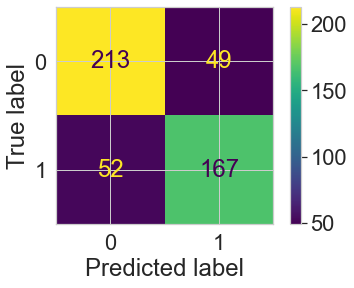

Classification Report of Model 1
 
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       262
           1       0.77      0.76      0.77       219

    accuracy                           0.79       481
   macro avg       0.79      0.79      0.79       481
weighted avg       0.79      0.79      0.79       481



In [25]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix of Model 1")
plot_confusion_matrix(ran_clf,X_test_1,y_test_1)
plt.show()

# Classification Report
print("Classification Report of Model 1")
print(" ")
print(classification_report(y_test_1,y_pred_ran))

Model 2: Suite 2 (60% for training and 40% for testing) and Random Forest Model

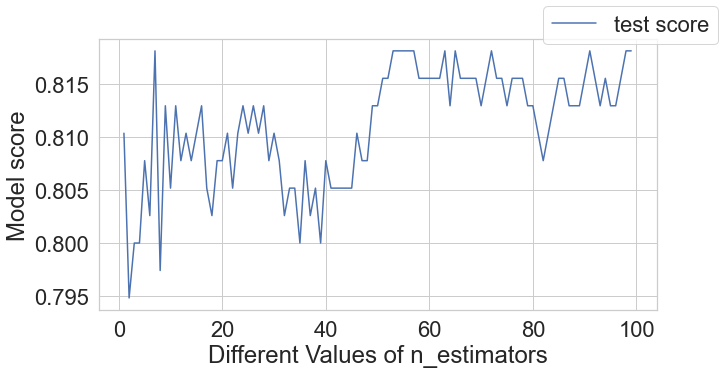

In [26]:
# Tuining Random Forest Model

r_list = []   # Empty list for n_estimators
acc_list = [] # Empty list for accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

for r in range(1,100):
    ran_clf= RandomForestClassifier(n_estimators=r, random_state = 654) # random forest model
    ran_clf.fit(X_train_2,y_train_2)                                    # fit training set
    y_pred_ran = ran_clf.predict(X_test_2)                              # predict
    random_acc = metrics.accuracy_score(y_test_2,y_pred_ran)            # calculate accuracy
    r_list.append(r)                                                    
    acc_list.append(random_acc)

# Plot r_list and acc_list to view the accuracy of each n_estimators

plt.figure(figsize=(10,5))                     # Set Figure size
plt.xlabel('Different Values of n_estimators') # Set xlabel
plt.ylabel('Model score')                      # Set ylabel
plt.plot(r_list, acc_list, color = 'b', label = 'test score') # plot
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure) # Legend
plt.show()

In [27]:
# Select the best n_estimeter for this case
ran_clf= RandomForestClassifier(n_estimators=7, random_state = 654)
ran_clf.fit(X_train_2,y_train_2)
y_pred_ran = ran_clf.predict(X_test_2)
random_acc = metrics.accuracy_score(y_test_2,y_pred_ran)
print(random_acc)

0.8181818181818182


Confusion Matrix of Model 2


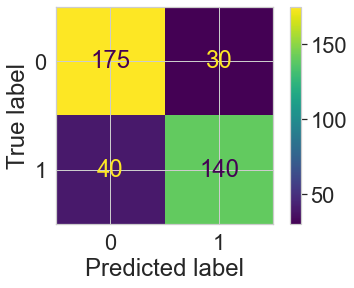

Classification Report of Model 2
 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       205
           1       0.82      0.78      0.80       180

    accuracy                           0.82       385
   macro avg       0.82      0.82      0.82       385
weighted avg       0.82      0.82      0.82       385



In [28]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix of Model 2")
plot_confusion_matrix(ran_clf,X_test_2,y_test_2)
plt.show()

# Classification Report
print("Classification Report of Model 2")
print(" ")
print(classification_report(y_test_2,y_pred_ran))

Model 3: Suite 3 (80% for training and 20% for testing) and Random Forest Model

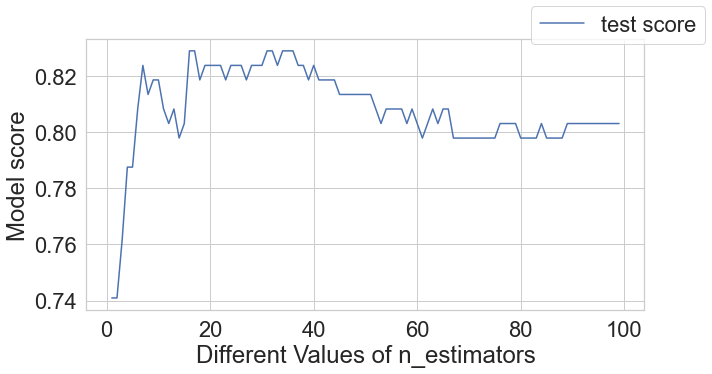

In [29]:
# Tuining Random Forest Model

r_list = []   # Empty list for n_estimators
acc_list = [] # Empty list for accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

for r in range(1,100):
    ran_clf= RandomForestClassifier(n_estimators=r, random_state = 654) # random forest model
    ran_clf.fit(X_train_3,y_train_3)                                    # fit training set
    y_pred_ran = ran_clf.predict(X_test_3)                              # predict
    random_acc = metrics.accuracy_score(y_test_3,y_pred_ran)            # calculate accuracy
    r_list.append(r)                                                    
    acc_list.append(random_acc)

# Plot r_list and acc_list to view the accuracy of each n_estimators

plt.figure(figsize=(10,5))                     # Set Figure size
plt.xlabel('Different Values of n_estimators') # Set xlabel
plt.ylabel('Model score')                      # Set ylabel
plt.plot(r_list, acc_list, color = 'b', label = 'test score') # plot
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure) # Legend
plt.show()

In [30]:
# Select the best n_estimeter for this case
ran_clf= RandomForestClassifier(n_estimators=17, random_state = 654)
ran_clf.fit(X_train_3,y_train_3)
y_pred_ran = ran_clf.predict(X_test_3)
random_acc = metrics.accuracy_score(y_test_3,y_pred_ran)
print(random_acc)

0.8290155440414507


Confusion Matrix of Model 3


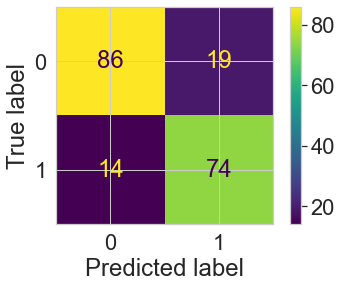

Classification Report of Model 3
 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       105
           1       0.80      0.84      0.82        88

    accuracy                           0.83       193
   macro avg       0.83      0.83      0.83       193
weighted avg       0.83      0.83      0.83       193



In [31]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
print("Confusion Matrix of Model 3")
plot_confusion_matrix(ran_clf,X_test_3,y_test_3)
plt.show()

# Classification Report
print("Classification Report of Model 3")
print(" ")
print(classification_report(y_test_3,y_pred_ran))

#### 2. Second Classification Model (K-Nearest Neighbors)

Model 4: Suite 1 (50% for training and 50% for testing) and K-Nearest Neighbors

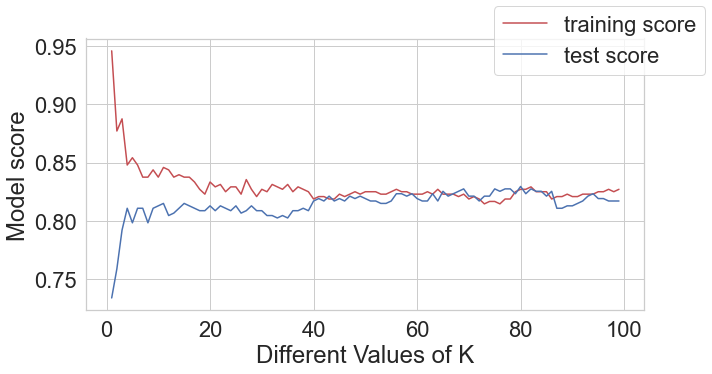

In [32]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_knn = sc_X.fit_transform(X_train_1) # Fit transofrm
X_test_knn = sc_X.transform(X_test_1)       # Fit

# Predict the data and changing n_neighbors for finding the highest test train score.
from sklearn.neighbors import KNeighborsClassifier

# Tuining KNN

train_score = [] # Empty list for train score
test_score = []  # Empty list for test score
k_vals = []      # Empty list for k_neighbors

for k in range(1, 100):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)     # Loop n_neighbors
    knn.fit(X_train_knn, y_train_1)                 # Fit 
    
    tr_score = knn.score(X_train_knn, y_train_1)    # Train score
    train_score.append(tr_score)
    
    te_score = knn.score(X_test_knn, y_test_1)      # Test score
    test_score.append(te_score)

# Plot train_score, test_score and k_vals to view the accuracy and score

plt.figure(figsize=(10,5))             # Set Figure size
plt.xlabel('Different Values of K')    # Set X label
plt.ylabel('Model score')              # Set Y label
plt.plot(k_vals, train_score, color = 'r', label = "training score")  
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [33]:
# Choose K_neighbor 
knn = KNeighborsClassifier(n_neighbors = 79)
knn.fit(X_train_knn, y_train_1)
y_pred_knn = knn.predict(X_test_knn)
knn_acc = metrics.accuracy_score(y_test_1,y_pred_knn)
print(f"KNN Accuracy Score: {knn_acc}")

KNN Accuracy Score: 0.8232848232848233


Confusion Matrix of Model 4


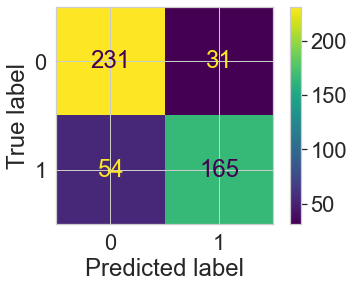

Classification Report of Model 4
 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       262
           1       0.84      0.75      0.80       219

    accuracy                           0.82       481
   macro avg       0.83      0.82      0.82       481
weighted avg       0.82      0.82      0.82       481



In [34]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# KNN Matrix
print("Confusion Matrix of Model 4")
plot_confusion_matrix(knn,X_test_knn,y_test_1)
plt.show()

# KNN Classification Report
print("Classification Report of Model 4")
print(" ")
print(classification_report(y_test_1,y_pred_knn))


Model 5: Suite 2 (60% for training and 40% for testing) and K-Nearest Neighbors

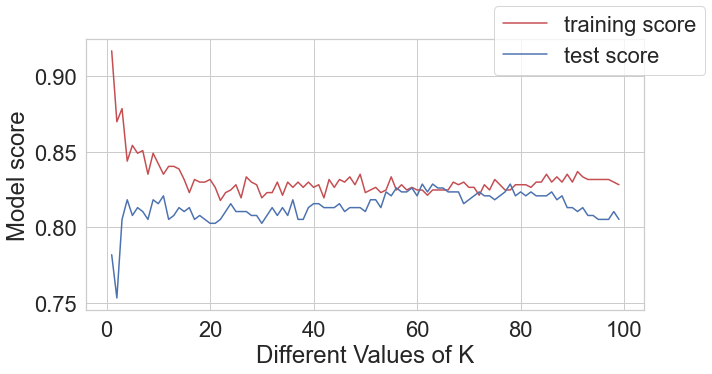

In [35]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_knn = sc_X.fit_transform(X_train_2) # Fit transofrm
X_test_knn = sc_X.transform(X_test_2)       # Fit

# Predict the data and changing n_neighbors for finding the highest test train score.
from sklearn.neighbors import KNeighborsClassifier

# Tuining KNN

train_score = [] # Empty list for train score
test_score = []  # Empty list for test score
k_vals = []      # Empty list for k_neighbors

for k in range(1, 100):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)     # Loop n_neighbors
    knn.fit(X_train_knn, y_train_2)                 # Fit 
    
    tr_score = knn.score(X_train_knn, y_train_2)    # Train score
    train_score.append(tr_score)
    
    te_score = knn.score(X_test_knn, y_test_2)      # Test score
    test_score.append(te_score)

# Plot train_score, test_score and k_vals to view the accuracy and score

plt.figure(figsize=(10,5))             # Set Figure size
plt.xlabel('Different Values of K')    # Set X label
plt.ylabel('Model score')              # Set Y label
plt.plot(k_vals, train_score, color = 'r', label = "training score")  
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [36]:
# Choose K_neighbor 
knn = KNeighborsClassifier(n_neighbors = 78)
knn.fit(X_train_knn, y_train_2)
y_pred_knn = knn.predict(X_test_knn)
knn_acc = metrics.accuracy_score(y_test_2,y_pred_knn)
print(f"KNN Accuracy Score: {knn_acc}")

KNN Accuracy Score: 0.8285714285714286


Confusion Matrix of Model 5


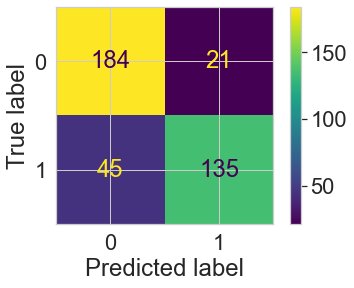

Classification Report of Model 5
 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       205
           1       0.87      0.75      0.80       180

    accuracy                           0.83       385
   macro avg       0.83      0.82      0.83       385
weighted avg       0.83      0.83      0.83       385



In [37]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# KNN Matrix
print("Confusion Matrix of Model 5")
plot_confusion_matrix(knn,X_test_knn,y_test_2)
plt.show()

# KNN Classification Report
print("Classification Report of Model 5")
print(" ")
print(classification_report(y_test_2,y_pred_knn))


Model 6: Suite 2 (80% for training and 20% for testing) and K-Nearest Neighbors

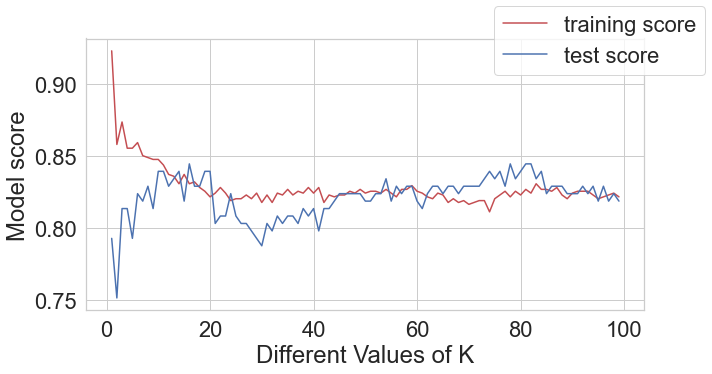

In [38]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_knn = sc_X.fit_transform(X_train_3) # Fit transofrm
X_test_knn = sc_X.transform(X_test_3)       # Fit

# Predict the data and changing n_neighbors for finding the highest test train score.
from sklearn.neighbors import KNeighborsClassifier

# Tuining KNN

train_score = [] # Empty list for train score
test_score = []  # Empty list for test score
k_vals = []      # Empty list for k_neighbors

for k in range(1, 100):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)     # Loop n_neighbors
    knn.fit(X_train_knn, y_train_3)                 # Fit 
    
    tr_score = knn.score(X_train_knn, y_train_3)    # Train score
    train_score.append(tr_score)
    
    te_score = knn.score(X_test_knn, y_test_3)      # Test score
    test_score.append(te_score)

# Plot train_score, test_score and k_vals to view the accuracy and score

plt.figure(figsize=(10,5))             # Set Figure size
plt.xlabel('Different Values of K')    # Set X label
plt.ylabel('Model score')              # Set Y label
plt.plot(k_vals, train_score, color = 'r', label = "training score")  
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [39]:
# Choose K_neighbor 
knn = KNeighborsClassifier(n_neighbors = 58)
knn.fit(X_train_knn, y_train_3)
y_pred_knn = knn.predict(X_test_knn)
knn_acc = metrics.accuracy_score(y_test_3,y_pred_knn)
print(f"KNN Accuracy Score: {knn_acc}")

KNN Accuracy Score: 0.8290155440414507


Confusion Matrix of Model 6


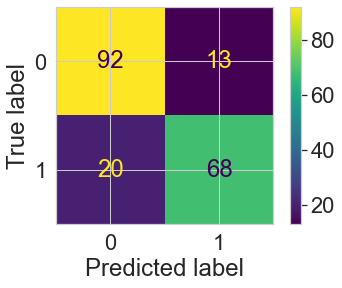

Classification Report of Model 6
 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.84      0.77      0.80        88

    accuracy                           0.83       193
   macro avg       0.83      0.82      0.83       193
weighted avg       0.83      0.83      0.83       193



In [40]:
# Print info of this suite (Confusion matrix, Classification accuracy o Precision, Recall, F1 score and report them in the report required in Task 4.)
from sklearn.metrics import classification_report

# KNN Matrix
print("Confusion Matrix of Model 6")
plot_confusion_matrix(knn,X_test_knn,y_test_3)
plt.show()

# KNN Classification Report
print("Classification Report of Model 6")
print(" ")
print(classification_report(y_test_3,y_pred_knn))


#### Comparing the two chosen models via appropriate graphical visualizations based upon the above evaluation results.

In [41]:
# From all classification report model, we got a each model Confusion matrix, Classification accuracy, Precision, and F1 score
# Therefore, we can store these value in dataframe for graphing later on

model_list     = ["Model 1"  ,"Model 2"  ,"Model 3"  ,"Model 4"  ,"Model 5","Model 6"]
suite_list     = ["50/50"    ,"60/40"    ,"80/20"    ,"50/50"    ,"60/40"  ,"80/20"  ]
type_list      = ["Ranforest","Ranforest","Ranforest","KNN"      ,"KNN"    ,"KNN"    ]
accuracy_list  = [0.790      ,0.818      ,0.829      ,0.823      ,0.828    ,0.829    ]
precision_list = [0.79       ,0.82       ,0.83       ,0.82       ,0.83     ,0.83     ]
recall_list    = [0.79       ,0.82       ,0.83       ,0.82       ,0.83     ,0.83     ]
f1_score       = [0.79       ,0.82       ,0.83       ,0.82       ,0.83     ,0.83     ]

evaluation_data_dict = {'Suite': suite_list, 'Model type': type_list, "Accuracy":accuracy_list, "Precision":precision_list, "Recall":recall_list, "F1 Score":f1_score}
evaluation_data = pd.DataFrame(data=evaluation_data_dict,index=model_list)

In [42]:
evaluation_data

,Suite,Model type,Accuracy,Precision,Recall,F1 Score
Model 1,50/50,Ranforest,0.790,0.79,0.79,0.79
Model 2,60/40,Ranforest,0.818,0.82,0.82,0.82
Model 3,80/20,Ranforest,0.829,0.83,0.83,0.83
Model 4,50/50,KNN,0.823,0.82,0.82,0.82
Model 5,60/40,KNN,0.828,0.83,0.83,0.83
Model 6,80/20,KNN,0.829,0.83,0.83,0.83


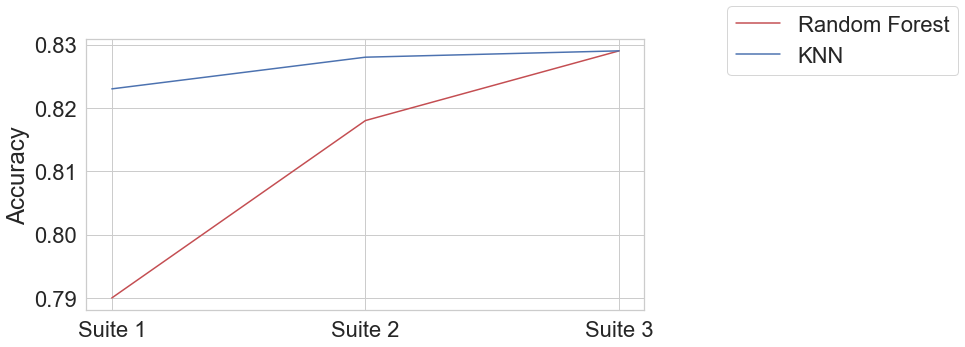

In [43]:
plt.figure(figsize=(10,5))             # Set Figure size
plt.ylabel('Accuracy')                 # Set Y label
plt.title("")
plt.xticks([1,2,3],["Suite 1","Suite 2","Suite 3"])
plt.plot([1,2,3], evaluation_data["Accuracy"][:3], color = 'r', label = "Random Forest")  
plt.plot([1,2,3], evaluation_data["Accuracy"][3:], color = 'b', label = 'KNN')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

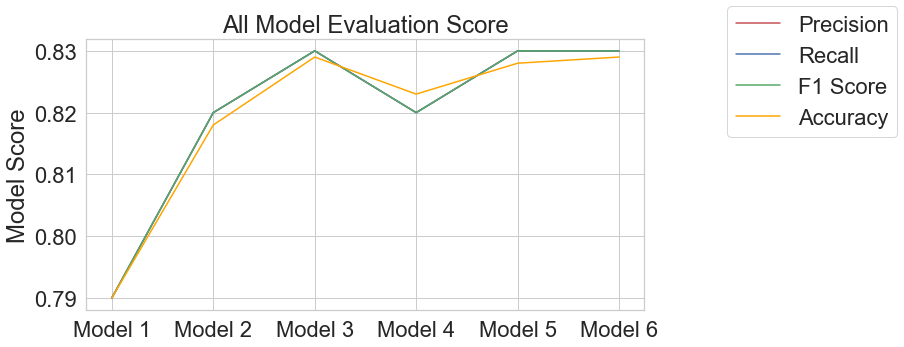

In [44]:
plt.figure(figsize=(10,5))             # Set Figure size
plt.ylabel('Model Score')              # Set Y label
plt.title("All Model Evaluation Score")
plt.xticks([1,2,3,4,5,6],["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6"])
plt.plot([1,2,3,4,5,6], evaluation_data["Precision"], color = 'r', label = "Precision") 
plt.plot([1,2,3,4,5,6], evaluation_data["Recall"], color = 'b', label = "Recall")  
plt.plot([1,2,3,4,5,6], evaluation_data["F1 Score"], color = 'g', label = "F1 Score")  
plt.plot([1,2,3,4,5,6], evaluation_data["Accuracy"], color = 'orange', label = "Accuracy")  
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

<b>Conclusion</b> After taking calculated accuracy value, confusion matrix, report into consideration, KNN classification model is more effective than random forest model. Because this dataset have a small number of rows (only 961 rows). Therefore, the weakness of KNN which is the cost of calculating the distances between new point and existing point can be ignored. Furthermore, by observing the pair plot there are quite clear feature relationship to the target variable only a few data lean on each other (Most of the groups are slightly separated from each other). Moreover, KNN is easier to tune compared to random forest because there is only one variable to tune. This will benefit the accuracy of KNN. In addition, this dataset fully filled the basics criterion of KNN which are noise-free data, labeled data, and small data.